<a href="https://colab.research.google.com/github/Mrinal7862/Dimensionality-Clustering/blob/main/KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [63]:
from sklearn.datasets import make_blobs

x,y = make_blobs(n_samples=1000, centers=3, n_features=2, random_state=1)

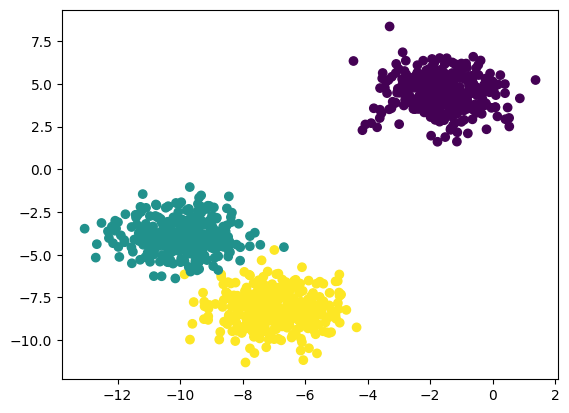

In [64]:
plt.scatter(x[:,0], x[:,1], c=y)

In [65]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=0)

In [66]:
from sklearn.cluster import KMeans


In [67]:
kmeans = KMeans(n_clusters=3)


In [68]:
 kmeans.fit(x_train)

KMeans(n_clusters=3)

In [69]:
y_label = kmeans.predict(x_test)

In [70]:
y_label

array([1, 0, 2, 0, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 1, 2, 1, 0, 1, 1, 2, 1,
       1, 1, 2, 2, 0, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 2, 1,
       0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 0, 0, 1,
       2, 1, 1, 1, 2, 1, 0, 1, 1, 2, 0, 0, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1,
       1, 0, 1, 2, 1, 2, 2, 2, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 2, 0, 2, 2, 0, 2, 1, 2, 2, 0, 1, 0, 1, 2, 1, 1, 0, 0, 1,
       2, 1, 2, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 2, 1, 2, 1, 1, 0, 2, 2, 1,
       1, 0, 0, 2, 0, 1, 0, 2, 0, 1, 2, 2, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2,
       1, 2, 0, 0, 1, 2, 0, 2, 1, 1, 2, 0, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2,
       0, 2, 0, 1, 0, 2, 2, 1, 2, 2, 2, 2, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 1, 1, 1, 1,
       2, 0, 1, 0, 2, 1, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 1, 0, 2, 0, 2, 1, 1, 0, 0, 0, 1, 2, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0], d

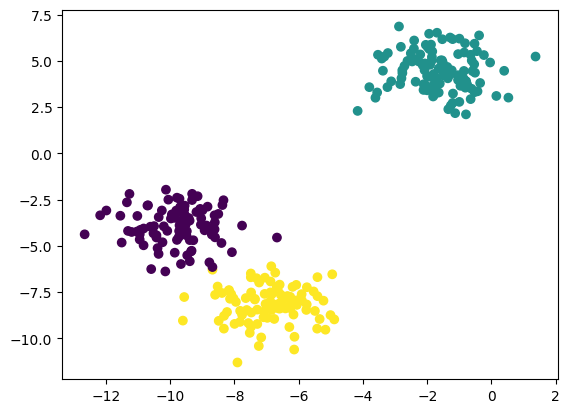

In [71]:
plt.scatter(x_test[:,0], x_test[:,1], c=y_label) #on train data

In [73]:
from sklearn.metrics import silhouette_score

silhouette_score(x_train, kmeans.labels_) #close to 1 means a better model

np.float64(0.7186595174547418)

In [74]:
kmeans.inertia_

1400.1353698960543

In [75]:
wcss = []

for k in range(1, 10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(x_train)
  wcss.append(kmeans.inertia_)

In [76]:
wcss

[28735.10903432707,
 4582.659201593794,
 1400.1353698960543,
 1228.4685906918535,
 1163.5144297377428,
 952.7403530986437,
 831.2288383160492,
 734.8095500661049,
 613.4303096755222]

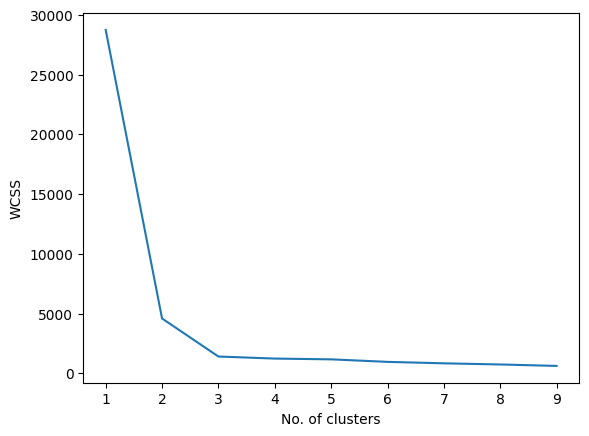

In [79]:
# plot elbow curve
plt.plot(range(1, 10), wcss)
plt.xticks(range(1, 10))
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.show()

In [80]:
# based on the graph the centroid is at 3



ModuleNotFoundError: No module named 'kneed'

In [81]:
!pip install kneed

In [85]:
from kneed import KneeLocator

kl = KneeLocator(range(1, 10), wcss, curve='convex', direction='decreasing')
kl.elbow

np.int64(2)

In [87]:
silhoute_coefficient  = []
for k in range(2, 10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(x_train)
  silhoute_coefficient.append(silhouette_score(x_train, kmeans.labels_))

In [88]:
silhoute_coefficient

[np.float64(0.7661317320568599),
 np.float64(0.7186595174547418),
 np.float64(0.5495119733056434),
 np.float64(0.4886358436172593),
 np.float64(0.32301247752529566),
 np.float64(0.42792021340533737),
 np.float64(0.33388051887782516),
 np.float64(0.3319818921764488)]

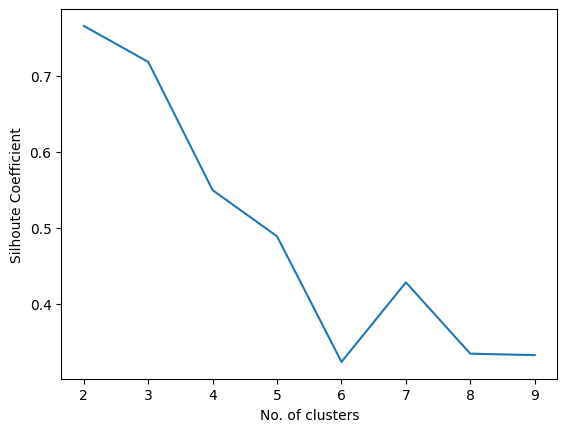

In [89]:
plt.plot(range(2, 10), silhoute_coefficient)
plt.xticks(range(2, 10))
plt.xlabel("No. of clusters")
plt.ylabel("Silhoute Coefficient")
plt.show()

# Hirarcheal Cluster

In [90]:
from sklearn.datasets import load_iris

data = load_iris()
x = data.data
y = data.target

In [91]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [92]:
x_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [93]:
from sklearn.decomposition import PCA

In [94]:
pcs = PCA(n_components=2)

In [96]:
pca_scaled = pcs.fit_transform(x_scaled)

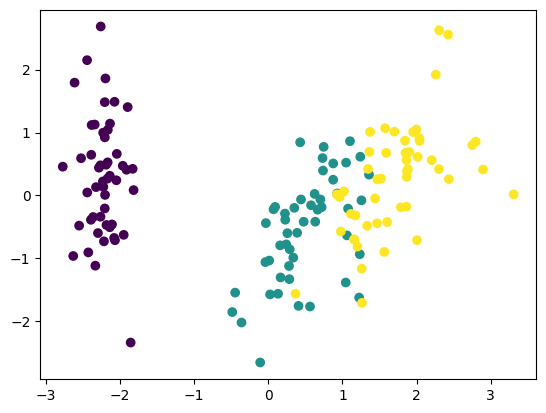

In [98]:
plt.scatter(pca_scaled[:, 0], pca_scaled[:, 1], c=y)

In [99]:
#  Aglomerative cluster

In [101]:
import scipy.cluster.hierarchy as sc

<Figure size 20000x1000 with 0 Axes>

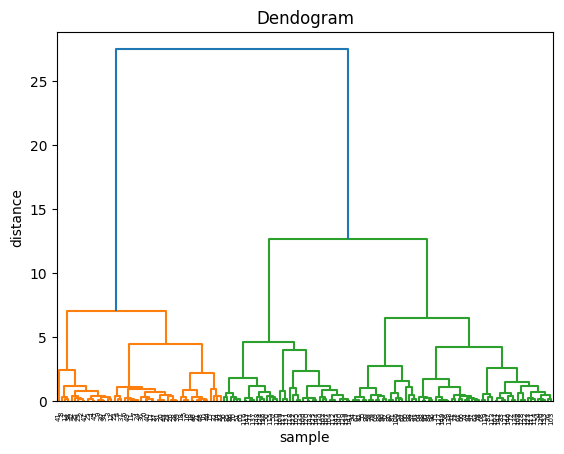

In [108]:
plt.figure(figsize=(200, 10))
plt.figure("dendrogram")

sc.dendrogram(sc.linkage(pca_scaled, method='ward'))
plt.title("Dendogram")
plt.xlabel("sample")
plt.ylabel("distance")
plt.show()

In [109]:
from sklearn.cluster import AgglomerativeClustering

In [114]:
clustering = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')

In [115]:
clustering.fit(pca_scaled)

AgglomerativeClustering()

In [116]:
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

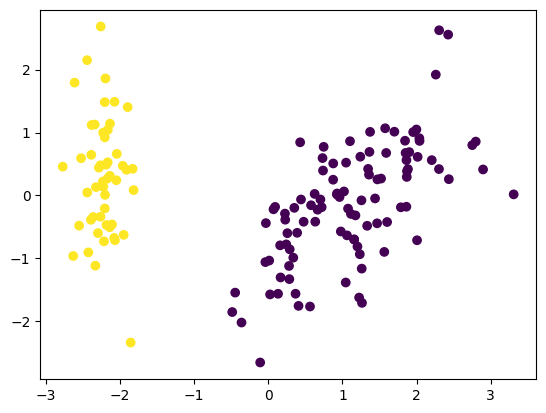

In [117]:
plt.scatter(pca_scaled[:,0], pca_scaled[:,1], c=clustering.labels_)

In [120]:
wcss = []

for k in range(2, 10):
  aglo = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
  aglo.fit(pca_scaled)
  score = silhouette_score(pca_scaled, aglo.labels_)
  wcss.append(score)


In [121]:
wcss

[np.float64(0.6145202036230452),
 np.float64(0.5110595988766189),
 np.float64(0.4487350420958893),
 np.float64(0.4041689631006268),
 np.float64(0.36721128895830735),
 np.float64(0.3706820678912666),
 np.float64(0.3930552606912112),
 np.float64(0.4183694466469872)]

<Figure size 20000x1000 with 0 Axes>

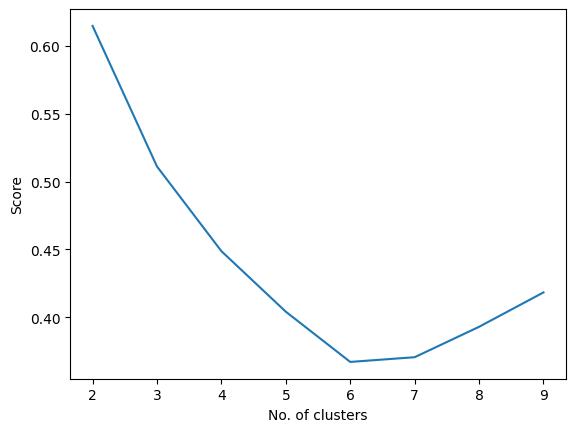

In [122]:
plt.figure(figsize=(200, 10))
plt.figure("Score")
plt.plot(range(2,10), wcss)
plt.xlabel("No. of clusters")
plt.ylabel("Score")
plt.show()

# DBSCAN

In [123]:
from sklearn.cluster  import DBSCAN
from sklearn.datasets import make_moons

x,y = make_moons(n_samples=250, noise=0.10)

In [124]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=1)

In [131]:
dbs = DBSCAN(eps=0.2)

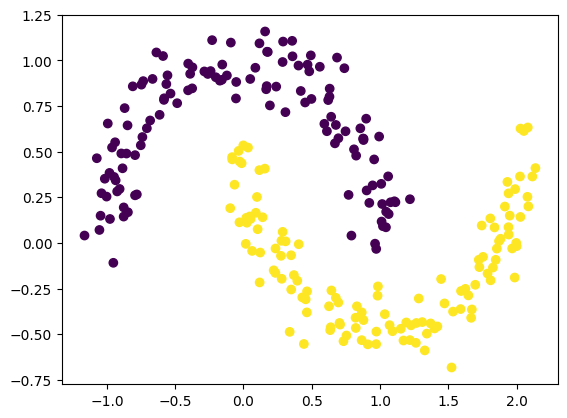

In [132]:
plt.scatter(x[:,0], x[:,1], c=y)

In [133]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_scaled = scaler.fit_transform(x)

In [134]:
x_scaled

array([[-6.66496357e-01,  4.39233924e-01],
       [-1.91192979e-01, -1.51089813e+00],
       [-4.74437673e-01,  1.43683944e+00],
       [-1.70777837e-01,  1.73738687e+00],
       [-1.74449248e+00,  3.61921045e-02],
       [ 5.47179363e-01,  6.68915886e-01],
       [ 1.37449977e+00, -7.88577698e-01],
       [ 1.53104007e-01, -1.04894538e+00],
       [-4.55671387e-01, -3.65204209e-01],
       [ 1.39398879e+00, -3.23987785e-01],
       [ 1.36958567e+00, -7.06686325e-01],
       [-5.44811144e-01, -2.92880529e-01],
       [-1.42032255e+00,  5.71789598e-01],
       [ 6.41706903e-01, -6.44888448e-02],
       [ 2.10891472e-01,  6.50174431e-01],
       [ 1.90242616e-01,  7.98472623e-01],
       [-1.32318404e+00,  1.31216203e+00],
       [-1.56536883e-01, -8.77414895e-01],
       [ 1.34073350e+00, -9.85578133e-01],
       [ 1.44216070e+00, -8.59856014e-01],
       [ 5.37266066e-01, -1.00365287e+00],
       [-6.46502720e-01,  1.31562672e-01],
       [-1.67786834e-01,  1.56465809e+00],
       [-1.

In [135]:
dbs.fit(x_scaled)

DBSCAN(eps=0.2)

In [136]:
dbs.labels_

array([ 0, -1,  1,  7,  1,  2,  3,  8,  4,  3,  3,  4,  1,  5,  2,  2,  1,
        6,  3,  3, -1, -1,  7,  1,  7,  3,  6,  1,  7,  1,  1,  1,  3,  8,
        1,  1,  3,  8,  1,  8,  5,  6,  1,  5,  1,  6,  6, -1,  8,  1,  3,
        6,  0,  8,  8,  7,  2, -1,  1,  3,  3,  8,  1,  3,  1,  8,  3, -1,
        7, -1,  6,  1,  0, -1,  2,  2,  8,  1,  2,  3,  2,  1, -1,  1,  1,
        8,  5,  4,  6,  3,  3,  6,  8,  1,  1,  6,  8,  1,  8,  7,  7,  2,
        7,  5,  1,  3, -1,  1,  4,  2,  1,  3,  8,  8, -1,  8,  5,  1,  6,
        6,  8,  2,  1,  8,  3,  6,  5,  5,  1,  5,  6,  8,  3,  3,  8, -1,
        1,  3,  3,  2, -1,  5,  4,  1,  8,  1,  1,  5,  8,  1,  2,  1,  5,
        3,  8,  1,  8,  1,  4,  1,  0, -1,  6,  8, -1,  1,  8,  1,  4,  1,
        1,  3,  1, -1, -1,  2,  3,  7,  8,  7, -1,  3,  6,  2,  3,  1,  3,
        4,  2,  7,  1,  2,  1, -1,  3,  0,  3,  1,  3,  1,  8,  1,  8,  1,
        2,  1,  2,  0,  8,  6,  1,  1,  3, -1,  1, -1,  6, -1,  2,  2,  4,
        1,  5,  1,  8,  2

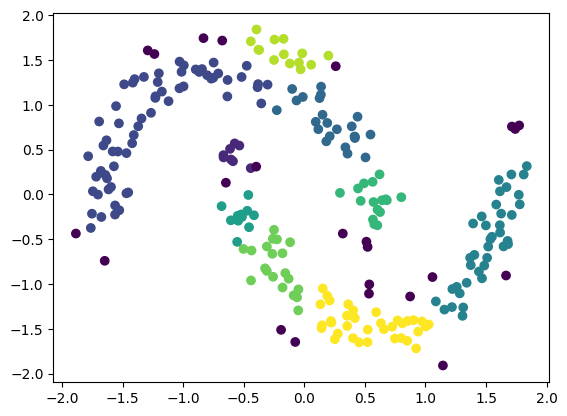

In [137]:
plt.scatter(x_scaled[:,0], x_scaled[:,1], c=dbs.labels_)